<a href="https://colab.research.google.com/github/geoafrikana/geo-datascience/blob/main/geo_datastructures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install geopandas contextily osmnx xarray datashader rioxarray shapely pysal -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [98]:
import numpy, pandas, osmnx, geopandas, rioxarray, xarray, datashader, requests, contextily as cx, seaborn
from shapely import geometry
import matplotlib.pyplot as plt
from pysal.lib import cg

In [54]:
countries_cleaned_url = 'https://geographicdata.science/book/_downloads/aa6db374135e277124917938efb06371/countries_clean.gpkg'
tokyo_cleaned_url = 'https://geographicdata.science/book/_downloads/7fb86b605af15b3c9cbd9bfcbead23e9/tokyo_clean.csv'
sao_paolo_url = 'https://geographicdata.science/book/_downloads/5263090bd0bdbd7d1635505ff7d36d04/ghsl_sao_paulo.tif'

In [56]:
def down(url, name):
  r = requests.get(url, allow_redirects=True)
  open(name, 'wb').write(r.content)

In [7]:
gt_polygons = geopandas.read_file('/content/countries_clean.gpkg')

In [8]:
gt_polygons['centroid'] = gt_polygons.centroid

In [9]:
gt_polygons.head()

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-8277554.831 -1032942.536)


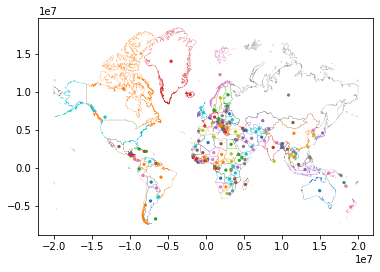

In [23]:
ax = gt_polygons.set_geometry(
    'centroid'
).plot('ADMIN', markersize=5)

gt_polygons.plot(
    'ADMIN', 
    ax=ax, 
    facecolor='none', 
    edgecolor='k', 
    linewidth=.2
);

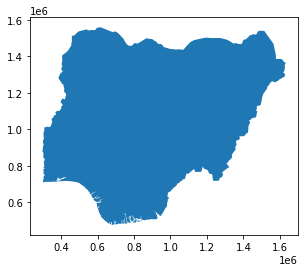

In [25]:
gt_polygons.query('ADMIN == "Nigeria"').plot()

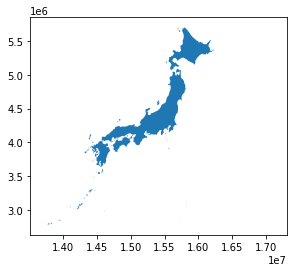

In [42]:
gt_polygons[gt_polygons.ADMIN.str.contains('Jap')].plot()

In [45]:
r = requests.get(tokyo_cleaned_url, allow_redirects=True)
open('tokyo_clean.csv', 'wb').write(r.content)

1499522

In [47]:
tokyo = pandas.read_csv('/content/tokyo_clean.csv')

In [48]:
tokyo.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


In [50]:
tokyo_geoms = geopandas.points_from_xy(
    x=tokyo["longitude"],
    y=tokyo["latitude"],
    # x,y are Earth longitude & latitude
    crs="EPSG:4326"
)

In [52]:
tokyo = geopandas.GeoDataFrame(tokyo, geometry=tokyo_geoms)

In [53]:
tokyo.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.70050 35.67400)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.70909)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06,POINT (139.76875 35.67152)


In [64]:
down(sao_paolo_url, 'ghsl_sao_paulo.tif')

In [65]:
pop = xarray.open_rasterio('/content/ghsl_sao_paulo.tif')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


In [66]:
type(pop)

xarray.core.dataarray.DataArray

In [67]:
pop.coords

Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06

In [68]:
pop.attrs

{'AREA_OR_POINT': 'Area',
 'crs': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True',
 'grid_mapping': 'spatial_ref',
 'is_tiled': 0,
 'nodatavals': (-200.0,),
 'offsets': (0.0,),
 'res': (250.0, 250.0),
 'scales': (1.0,),
 'transform': (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)}

In [69]:
pop.shape

(1, 416, 468)

In [70]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)>
array([[-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       ...,
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.]], dtype=float32)
Coordinates:
    band     int64 1
  * y        (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
  * x        (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
Attributes:
    transform:      (250.0, 0.0, -4482000.0, 0.0, -250.0, -2822000.0)
    crs:            +proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +...
    res:            (250.0, 250.0)
    is_tiled:       0
    nodatavals:     (-200.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

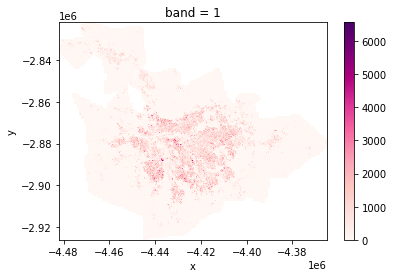

In [75]:
pop.where(pop >= 0).plot(cmap="RdPu");

In [84]:
graph = osmnx.graph_from_point((7.775813263762137, 4.545583580644855), dist=200)

In [85]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

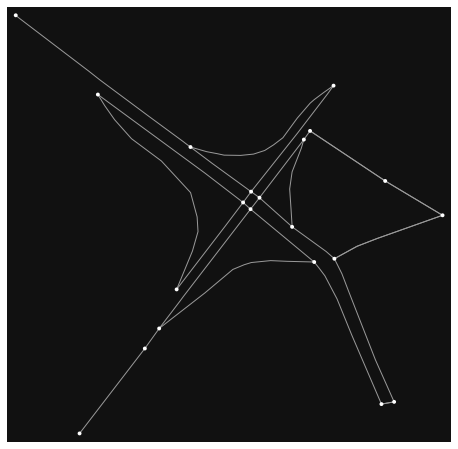

In [86]:
osmnx.plot_graph(graph);

In [90]:
len(graph.nodes)

21

In [88]:
graph.edges

OutMultiEdgeView([(1827414724, 1964870793, 0), (1827414724, 5235822312, 0), (1964870787, 3391605665, 0), (1964870787, 5235822300, 0), (1964870793, 3343875225, 0), (1964870793, 3391589652, 0), (2295273220, 3391589633, 0), (2295273220, 1964870787, 0), (3343875225, 5235822313, 0), (3343875225, 3391605657, 0), (3391589633, 2295273220, 0), (3391589639, 3391589640, 0), (3391589640, 6649094911, 0), (3391589646, 3391589652, 0), (3391589646, 1964870793, 0), (3391605657, 5235822305, 0), (3391605657, 1827414724, 0), (3391605664, 3391605666, 0), (3391605665, 3391605666, 0), (3391605665, 1964870787, 0), (3391605666, 3391605665, 0), (3391605666, 3391605664, 0), (5235822300, 3391605657, 0), (5235822300, 5235822305, 0), (5235822305, 3391605664, 0), (5235822312, 9550975988, 0), (5235822313, 3391589633, 0), (6649094911, 5235822313, 0), (6649094911, 3343875225, 0), (6649094919, 1827414724, 0), (6649094919, 5235822312, 0)])

In [89]:
graph.nodes[1964870787]

{'street_count': 3, 'x': 4.5462598, 'y': 7.7754342}

In [99]:
from pysal.lib import weights